In [20]:
import pandas as pd
import seaborn as sns

data = "./RicaMicrodonnees2022/Rica_France_micro_Donnees_ex2022.csv"

In [3]:
df = pd.read_csv(data, sep=';')

/tmp/ipykernel_7174/2574469160.py:1: DtypeWarning: Columns (70,113,117,118,119,121,124,126,141,145,148,150,151,176,178,182,184,190,193,195,201,203,223,227,228,229,230,232,234,235,237,245,246,247,248,252,253,262,280,281,285,287,288,292,294,295,299,301,302,306,308,309,313,322,323,327,329,330,334,336,337,341,343,344,348,350,351,355,357,358,362,364,365,369,371,372,375,377,378,381,389,392,395,399,401,402,405,410,412,419,421,438,439,443,445,446,450,452,453,457,459,460,464,466,467,471,473,474,478,480,481,485,494,495,499,501,502,506,508,509,512,514,515,518,520,521,524,545,546,548,549,551,552,554,555,563,564,566,567,569,570,572,573,575,576,578,579,581,582,584,585,587,588,590,591,593,594,596,597,599,600,602,603,605,606,608,609,611,612,614,615,617,618,620,621,623,624,627,629,630,632,633,635,636,638,639,641,642,644,645,647,648,650,651,656,659,660,662,663,666,669,671,672,674,675,683,684,687,689,690,692,694,695,697,699,700,702,704,705,707,709,710,712,789,964,967,968) have mixed types. Specify dtype 

Set low_memory=False : le read_csv n'arrive pas a deduire le type de certaines colonnes.
TODO : Idealement le preciser.

In [4]:
df.shape

(7322, 988)

7322 effectifs comme indique dans le .docx

# Verifications de base
Valeurs manquantes, comptes

In [6]:
df.isna().sum()[df.isna().sum()!=0]

Series([], dtype: int64)

In [14]:
df[df["IDNUM"].duplicated()]

,IDNUM,MILEX,PBUCE,CDEXE,OTEXE,OTE64F,OTEFDD,OTEFDA,EXTR2,NREG,...,PBV8AALTO,PBV8AALTX,PBV8AALVI,VAV8AALAU,VAV8AALBO,VAV8AALNR,VAV8AALOC,VAV8AALTO,VAV8AALTX,VAV8AALVI


In [9]:
df["CDEXE"].value_counts().sort_values()

CDEXE
5       24
6      429
10     992
7     1257
9     1796
8     2824
Name: count, dtype: int64

In [10]:
df["OTEXE"].value_counts()

OTEXE
37    984
45    855
15    835
46    726
50    664
16    579
48    515
39    455
83    409
28    298
47    219
29    213
84    154
61    121
38    116
74    106
73     73
Name: count, dtype: int64

On retrouve bien les valeurs annoncees dans le .docx

Les colonnes,
- OTEXE
- OTE64F
- OTEFDD
- OTEFDA

Sont differents referentiels de classification des OTEXE



# Travail sur un DTF reduit
Pour mieux comprendre le contenu

In [15]:
premiere_exploration = ["IDNUM","MILEX", "PBUCE", "CDEXE", "OTEXE", "NREG", "ZALTI", "ZDEFA", "ZENVI", "RIMPO", "FJURI"]
smdf = df[premiere_exploration]

In [18]:
smdf["MILEX"].value_counts()

MILEX
2022    7322
Name: count, dtype: int64

Toutes les valeurs sont liees a 2022.

In [19]:
smdf.drop(columns=['MILEX'], inplace=True)

/tmp/ipykernel_7174/3047848877.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smdf.drop(columns=['MILEX'], inplace=True)


In [22]:
smdf["PBUCE"].describe()

count       7322
unique      7282
top       265000
freq           4
Name: PBUCE, dtype: object

Le resultat du describe ne ressemble pas a celui d'une variable numerique.

In [33]:
smdf.dtypes

IDNUM     int64
PBUCE    object
CDEXE     int64
OTEXE     int64
NREG      int64
ZALTI     int64
ZDEFA     int64
ZENVI     int64
RIMPO     int64
FJURI     int64
dtype: object

PBUCE est un object (_Production brute standard en euros (typologie 2007)_)

In [35]:
smdf["PBUCE_N"]=[col.replace(',', '.') for col in smdf["PBUCE"]]

/tmp/ipykernel_7174/3007366083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smdf["PBUCE_N"]=[col.replace(',', '.') for col in smdf["PBUCE"]]


In [37]:
smdf["PBUCE_N"]=smdf["PBUCE_N"].astype(float)

/tmp/ipykernel_7174/177169107.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smdf["PBUCE_N"]=smdf["PBUCE_N"].astype(float)


In [38]:
smdf.dtypes

IDNUM        int64
PBUCE       object
CDEXE        int64
OTEXE        int64
NREG         int64
ZALTI        int64
ZDEFA        int64
ZENVI        int64
RIMPO        int64
FJURI        int64
PBUCE_N    float64
dtype: object

In [39]:
smdf[["PBUCE", "PBUCE_N"]]

,PBUCE,PBUCE_N
0,"86795,58",86795.58
1,"93307,87",93307.87
2,"340525,1",340525.10
3,"63798,16",63798.16
4,"802030,6",802030.60
...,...,...
7317,"204761,59",204761.59
7318,"376563,85",376563.85
7319,"204111,95",204111.95
7320,"413402,45",413402.45


In [40]:
smdf.drop(columns=['PBUCE'], inplace=True)
smdf.rename(columns={'PBUCE_N':'PBUCE'}, inplace=True)

/tmp/ipykernel_7174/3136160511.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smdf.drop(columns=['PBUCE'], inplace=True)
/tmp/ipykernel_7174/3136160511.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smdf.rename(columns={'PBUCE_N':'PBUCE'}, inplace=True)


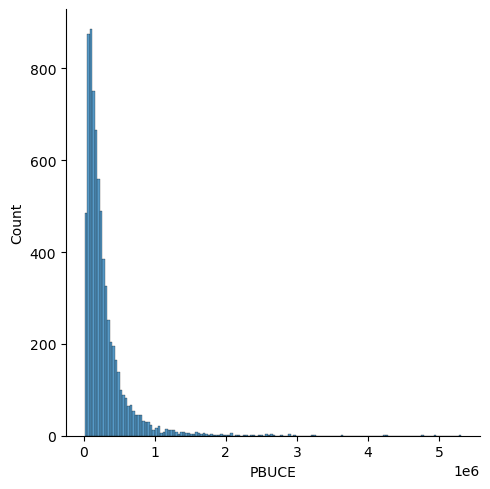

In [41]:
sns.displot(smdf, x="PBUCE", bins=150)